### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

Simply, you would just write your hypothesis in this way. 
$$H_0: \mu_{coff}  \geq  \mu_{no}$$


$$H_1: \mu_{coff}   < \mu_{no}$$

Also in the following way:

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_1: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`Or`, you could be interested in studying whether the average height for coffee drinkers is more than non-coffee drinkers

This is again a question with a direction. Below is one of the ways you could write the null and alternative hypothesis

$$H_0: \mu_{coff} - \mu_{no} \leq 0$$


$$H_1: \mu_{coff} - \mu_{no} > 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [2]:
nocoff_means, coff_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)   
    

In [3]:
np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.40512631277475264

In [4]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.24073763373473

In [5]:
np.std(diffs) # the standard deviation for the sampling distribution for difference in means

0.4698091074387147

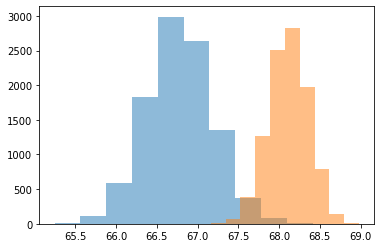

In [6]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5); # They look pretty normal to me!

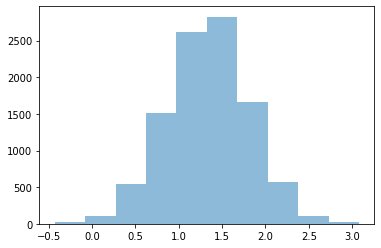

In [7]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

`4.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [8]:
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

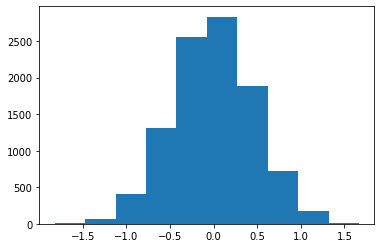

In [9]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null

# On the Sample Dataframe 

In [10]:
means = []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    mean = bootsamp['height'].mean()
    # append the info 
    means.append(mean)

means = np.array(means)

In [11]:
np.std(means)

0.2254093295258416

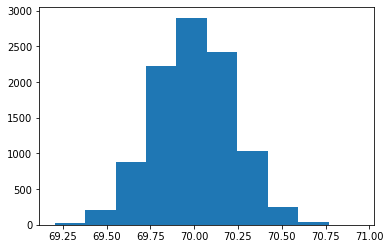

In [23]:
null_vals = np.random.normal(70.0, np.std(means), 10000)
plt.hist(null_vals);

In [24]:
sample_mean = sample_data.height.mean()
sample_mean

67.57907352931672

We want to check whether our Null generated this stastic or not

## Case 1: 

Alternate hypothesis is that population mean > 70 <br>
So, null hypothesis is that population mean <= 70 <br>


* We calculate p value as the proportion of the simulated draws that are larger than our sample mean
* Graphically p-value here indicates area under the curve for all the values greater than the highlighted red line. which is basically all the data

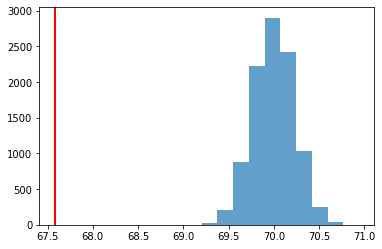

In [28]:
plt.hist(null_vals, alpha=0.7);
plt.axvline(sample_mean, color = 'red', linewidth=2);

In [25]:
(null_vals > sample_mean).mean()

1.0

Large p-value suggest that we can not reject our null hypothesis. which means that our population mean is indeed less than or equal to 70

## Case 2:

Alternate hypothesis is that population mean < 70 <br>
so, null hypothesis is that population mean >= 70

* We calculate p value as the proportion of the simulated rows that are smaller than our sample mean
* Graphically p-value here indicates area under the curve for all the values less than the highlighted red line. which is basically none of the data

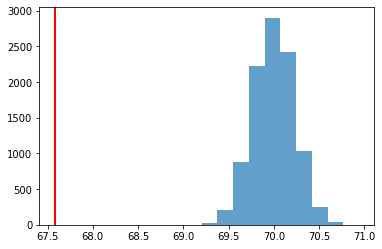

In [29]:
plt.hist(null_vals, alpha=0.7);
plt.axvline(sample_mean, color = 'red', linewidth=2);

In [27]:
(null_vals < sample_mean).mean()

0.0

Small p-value suggest that we reject our null hypothesis and accept our alternate hypothesis. which means that our population mean is less than 70. Which we have already seen from previous case

## Case 3:

Alternate hypothesis is that pulation mean is not equal to 70 <br>
So, null hypothesis is that population mean = 70

* We calculate p value as the proportion of the simulated rows that are more extreme than our sample mean in either direction
* Graphically p value here indicates area under the curve for all the values smaller than the lower bound and larger than the upper bound

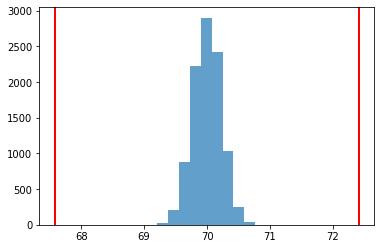

In [32]:
null_mean = null_vals.mean()
low = sample_mean
high = null_mean + (null_mean-sample_mean)

plt.hist(null_vals, alpha=0.7);
plt.axvline(low, color = 'red', linewidth=2);
plt.axvline(high, color = 'red', linewidth=2);

In [31]:
(null_vals < low).mean() + (null_vals>high).mean()

0.0

Small p value suggest that we reject our null hypothesis and accept our alternate hypothesis. which means that our population mean is not equal to 70 or to say that the null hypothesized value did not generate our sample statistic